In [1]:
import numpy as np
import pandas as pd
import joblib
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

sys.path.append("..")
from helpers import filename_for
from plotconf2 import *

Welcome to JupyROOT 6.16/00


In [2]:
features = ["T", "E", "Size", "EToF", "EnergyMoment", "TSpawn", "MaxEHit", "X", "Y", "Z"]
features_disp = ["$T$", "$E_{dep}$", "$N$", "$E_{ToF}$", "$E_M$", "$\Delta T$", "$E_{max}$", "$X$", "$Y$", "$Z$"]
# features = ["T", "E", "Size", "EToF", "MaxEHit", "Z"]
# features = ["T", "E", "Size", "EnergyMoment", "TSpawn", "MaxEHit", "X", "Y", "Z"]
# features = ["T", "E", "Size", "EnergyMoment", "TSpawn", "MaxEHit", "Z"]
# features = ["T", "E", "EToF", "Z"]
# features = ["T", "E", "Size", "EToF", "EnergyMoment", "TSpawn", "MaxEHit", "Z"]

In [3]:
from sklearn.ensemble import RandomForestClassifier


def train(x_train, y_train):
    settings = {
        "n_estimators": 60,
        "min_samples_split": 36,
        "min_samples_leaf": 6,
        "n_jobs": -1,
        "random_state": 1337,
    }
    model = RandomForestClassifier(**settings)
    model.fit(x_train, y_train)

    return model

In [4]:
def get_df(n, s):
    file = filename_for(15, 30, 600, 500, n, "inclxx", s, "clusterfeature.pkl")
    df = pd.read_pickle(file)
    df["nPN"] = n
    df["s"] = s
    return df


dfs = [get_df(n, s) for n in [1, 2, 3, 4] for s in range(20)]
data = pd.concat(dfs, ignore_index=True)

print(data["prim"].value_counts())
display(data)

0.0    8670780
1.0    1782525
Name: prim, dtype: int64


,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z,nPN,s
0,0.0,0.0,71.581505,63.396915,1.0,590.198181,2.274847e-13,0.000000,63.396915,-52.500000,-18.102734,1697.5,1,0
1,0.0,0.0,73.151093,84.208214,4.0,572.796570,3.417675e+00,0.789268,34.340248,-48.729828,-32.500000,1722.5,1,0
2,0.0,0.0,77.737602,7.413320,1.0,466.224731,2.273737e-13,0.000000,7.413320,-22.500000,-66.481422,1737.5,1,0
3,0.0,0.0,74.923073,54.931568,2.0,556.477112,3.014597e+00,0.361863,28.205269,-39.288017,22.500000,1752.5,1,0
4,0.0,0.0,79.689758,6.995298,1.0,447.399139,0.000000e+00,0.000000,6.995298,-13.274235,32.500000,1762.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453300,9999.0,0.0,85.814194,30.276972,1.0,360.921478,2.273741e-13,0.000000,30.276972,-81.505493,-2.500000,1782.5,4,19
10453301,9999.0,1.0,63.421486,1.582491,1.0,621.388550,8.881784e-16,0.000000,1.582491,-18.501257,-7.500000,1522.5,4,19
10453302,9999.0,1.0,64.527313,107.203804,2.0,592.722473,1.786238e+00,0.123449,83.293358,2.122552,12.500000,1532.5,4,19
10453303,9999.0,1.0,68.791878,7.254709,1.0,508.969696,2.274014e-13,0.000000,7.254709,27.792263,-72.500000,1572.5,4,19


In [5]:
prim1 = data[data["prim"] == 1]
prim0 = data[data["prim"] == 0].sample(n=len(prim1.index), random_state=1337)
balanced_data = pd.concat([prim0, prim1], ignore_index=True).sample(frac=1, random_state=1337)

print(balanced_data["prim"].value_counts())

1.0    1782525
0.0    1782525
Name: prim, dtype: int64


In [6]:
# model = train(balanced_data[features], balanced_data["prim"].values.ravel())
model = train(data[features], data["prim"].values.ravel())
joblib.dump(model, "models/15m_30dp_600AMeV_500keV_4n_RandomForestClassifier.pkl")

['models/15m_30dp_600AMeV_500keV_4n_RandomForestClassifier.pkl']

In [7]:
data["pred_prim"] = model.predict(data[features])
data["pred_prim_proba"] = model.predict_proba(data[features])[:, 1]
display(data)

,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z,nPN,s,pred_prim,pred_prim_proba
0,0.0,0.0,71.581505,63.396915,1.0,590.198181,2.274847e-13,0.000000,63.396915,-52.500000,-18.102734,1697.5,1,0,0.0,0.069207
1,0.0,0.0,73.151093,84.208214,4.0,572.796570,3.417675e+00,0.789268,34.340248,-48.729828,-32.500000,1722.5,1,0,0.0,0.076822
2,0.0,0.0,77.737602,7.413320,1.0,466.224731,2.273737e-13,0.000000,7.413320,-22.500000,-66.481422,1737.5,1,0,0.0,0.001562
3,0.0,0.0,74.923073,54.931568,2.0,556.477112,3.014597e+00,0.361863,28.205269,-39.288017,22.500000,1752.5,1,0,0.0,0.014605
4,0.0,0.0,79.689758,6.995298,1.0,447.399139,0.000000e+00,0.000000,6.995298,-13.274235,32.500000,1762.5,1,0,0.0,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453300,9999.0,0.0,85.814194,30.276972,1.0,360.921478,2.273741e-13,0.000000,30.276972,-81.505493,-2.500000,1782.5,4,19,0.0,0.008648
10453301,9999.0,1.0,63.421486,1.582491,1.0,621.388550,8.881784e-16,0.000000,1.582491,-18.501257,-7.500000,1522.5,4,19,1.0,0.784448
10453302,9999.0,1.0,64.527313,107.203804,2.0,592.722473,1.786238e+00,0.123449,83.293358,2.122552,12.500000,1532.5,4,19,1.0,0.840533
10453303,9999.0,1.0,68.791878,7.254709,1.0,508.969696,2.274014e-13,0.000000,7.254709,27.792263,-72.500000,1572.5,4,19,0.0,0.083274


In [8]:
print(confusion_matrix(data["prim"], data["pred_prim"]))
rfc_bac = balanced_accuracy_score(data["prim"], data["pred_prim"])
print(rfc_bac)

[[8398719  272061]
 [ 298185 1484340]]
0.9006704358707825


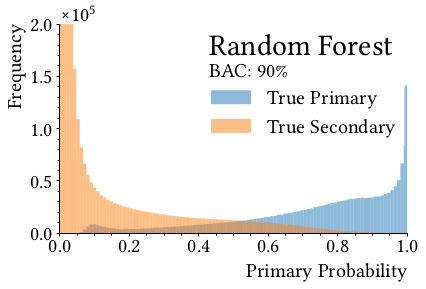

In [9]:
# data[data["prim"] == 0.0]["pred_prim_proba"].plot.hist(bins=50, alpha=0.5, figsize=(6.224, 6.224 / 1.618), colormap=palettable.colorbrewer.qualitative.Set1_9.mpl_colormap)
# ax = data[data["prim"] == 1.0]["pred_prim_proba"].plot.hist(bins=50, alpha=0.5)

fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
ax = fig.add_subplot(111)

ax.set_xlabel(r"Primary Probability", horizontalalignment="right", x=1)
ax.set_xlim(0, 1)
ax.set_ylabel(r"Frequency", horizontalalignment="right", y=1)
ax.set_ylim(0, 2e5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

p1 = data[data["prim"] == 1.0]["pred_prim_proba"].values
ax.hist(x=p1, bins=100, alpha=0.5, label="True Primary")

p0 = data[data["prim"] == 0.0]["pred_prim_proba"].values
ax.hist(x=p0, bins=100, alpha=0.5, label="True Secondary")

ax.text(
    0.43,
    0.9,
    "Random Forest",
    horizontalalignment="left",
    verticalalignment="center",
    transform=ax.transAxes,
    fontsize=30,
)

ax.text(
    0.43,
    0.78,
    f"BAC: {round(rfc_bac*100)}%",
    horizontalalignment="left",
    verticalalignment="center",
    transform=ax.transAxes,
    fontsize=20,
)

ax.legend(loc="upper right", bbox_to_anchor=(1.02, 0.77))#, prop={"size": "x-small"})

fig.savefig(f"results/rfc_hist.pdf", bbox_inches="tight")

display(fig)

In [10]:
mult_per_event = data.groupby(["s", "nPN", "i_event"])[["pred_prim"]].sum().rename(columns={"pred_prim": "nPN_pred"})
mult = mult_per_event.groupby(["nPN", "nPN_pred"]).size().to_frame("size")
display(mult)

size
nPN nPN_pred        
1   0.0        52497
    1.0       120617
    2.0        15233
    3.0         1604
    4.0          155
    5.0           14
    6.0            1
2   0.0         7583
    1.0        62707
    2.0        99132
    3.0        25700
    4.0         3911
    5.0          445
    6.0           51
    7.0            8
3   0.0          987
    1.0        17777
    2.0        65476
    3.0        79473
    4.0        29054
    5.0         6163
    6.0          915
    7.0          113
    8.0           19
4   0.0          123
    1.0         5310
    2.0        29977
    3.0        66310
    4.0        62999
    5.0        26770
    6.0         6979
    7.0         1299
    8.0          203
    9.0           25
    10.0           4

In [11]:
data.loc[data["pred_prim_proba"] >= 0.8, "pred_prim_08"] = 1.0
data.loc[data["pred_prim_proba"] < 0.8, "pred_prim_08"] = 0.0
display(data)

mult_per_event = (
    data.groupby(["s", "nPN", "i_event"])[["pred_prim_08"]].sum().rename(columns={"pred_prim_08": "nPN_pred"})
)
mult = mult_per_event.groupby(["nPN", "nPN_pred"]).size().to_frame("size")
display(mult)

,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z,nPN,s,pred_prim,pred_prim_proba,pred_prim_08
0,0.0,0.0,71.581505,63.396915,1.0,590.198181,2.274847e-13,0.000000,63.396915,-52.500000,-18.102734,1697.5,1,0,0.0,0.069207,0.0
1,0.0,0.0,73.151093,84.208214,4.0,572.796570,3.417675e+00,0.789268,34.340248,-48.729828,-32.500000,1722.5,1,0,0.0,0.076822,0.0
2,0.0,0.0,77.737602,7.413320,1.0,466.224731,2.273737e-13,0.000000,7.413320,-22.500000,-66.481422,1737.5,1,0,0.0,0.001562,0.0
3,0.0,0.0,74.923073,54.931568,2.0,556.477112,3.014597e+00,0.361863,28.205269,-39.288017,22.500000,1752.5,1,0,0.0,0.014605,0.0
4,0.0,0.0,79.689758,6.995298,1.0,447.399139,0.000000e+00,0.000000,6.995298,-13.274235,32.500000,1762.5,1,0,0.0,0.000145,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453300,9999.0,0.0,85.814194,30.276972,1.0,360.921478,2.273741e-13,0.000000,30.276972,-81.505493,-2.500000,1782.5,4,19,0.0,0.008648,0.0
10453301,9999.0,1.0,63.421486,1.582491,1.0,621.388550,8.881784e-16,0.000000,1.582491,-18.501257,-7.500000,1522.5,4,19,1.0,0.784448,0.0
10453302,9999.0,1.0,64.527313,107.203804,2.0,592.722473,1.786238e+00,0.123449,83.293358,2.122552,12.500000,1532.5,4,19,1.0,0.840533,1.0
10453303,9999.0,1.0,68.791878,7.254709,1.0,508.969696,2.274014e-13,0.000000,7.254709,27.792263,-72.500000,1572.5,4,19,0.0,0.083274,0.0


size
nPN nPN_pred        
1   0.0       116533
    1.0        72481
    2.0         1074
    3.0           32
    4.0            1
2   0.0        59585
    1.0       101953
    2.0        36992
    3.0          980
    4.0           26
    5.0            1
3   0.0        26801
    1.0        86229
    2.0        69611
    3.0        16718
    4.0          601
    5.0           17
4   0.0        11383
    1.0        62290
    2.0        81133
    3.0        38410
    4.0         6477
    5.0          294
    6.0           12

Feature: T, Score: 0.19206
Feature: E, Score: 0.12446
Feature: Size, Score: 0.02313
Feature: EToF, Score: 0.37968
Feature: EnergyMoment, Score: 0.02136
Feature: TSpawn, Score: 0.05141
Feature: MaxEHit, Score: 0.08825
Feature: X, Score: 0.03795
Feature: Y, Score: 0.03918
Feature: Z, Score: 0.04251


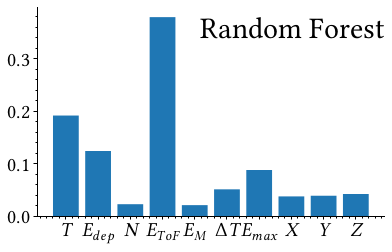

In [12]:
importance = model.feature_importances_

for i, v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (features[i], v))

fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
ax = fig.add_subplot(111)
ax.bar([x for x in range(len(importance))], importance, tick_label=features_disp)
ax.text(
    0.47,
    0.9,
    "Random Forest",
    horizontalalignment="left",
    verticalalignment="center",
    transform=ax.transAxes,
    fontsize=30,
)

fig.savefig(f"results/rfc_feat.pdf", bbox_inches="tight")

display(fig)

## Ada

In [13]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(balanced_data[features], balanced_data["prim"].values.ravel())
joblib.dump(ada_model, "models/15m_30dp_600AMeV_500keV_4n_AdaBoostClassifier.pkl")

['models/15m_30dp_600AMeV_500keV_4n_AdaBoostClassifier.pkl']

In [14]:
data["pred_prim"] = ada_model.predict(data[features])
data["pred_prim_proba"] = ada_model.predict_proba(data[features])[:, 1]
display(data)

,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z,nPN,s,pred_prim,pred_prim_proba,pred_prim_08
0,0.0,0.0,71.581505,63.396915,1.0,590.198181,2.274847e-13,0.000000,63.396915,-52.500000,-18.102734,1697.5,1,0,1.0,0.503509,0.0
1,0.0,0.0,73.151093,84.208214,4.0,572.796570,3.417675e+00,0.789268,34.340248,-48.729828,-32.500000,1722.5,1,0,0.0,0.495413,0.0
2,0.0,0.0,77.737602,7.413320,1.0,466.224731,2.273737e-13,0.000000,7.413320,-22.500000,-66.481422,1737.5,1,0,0.0,0.475828,0.0
3,0.0,0.0,74.923073,54.931568,2.0,556.477112,3.014597e+00,0.361863,28.205269,-39.288017,22.500000,1752.5,1,0,0.0,0.486642,0.0
4,0.0,0.0,79.689758,6.995298,1.0,447.399139,0.000000e+00,0.000000,6.995298,-13.274235,32.500000,1762.5,1,0,0.0,0.476531,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453300,9999.0,0.0,85.814194,30.276972,1.0,360.921478,2.273741e-13,0.000000,30.276972,-81.505493,-2.500000,1782.5,4,19,0.0,0.479372,0.0
10453301,9999.0,1.0,63.421486,1.582491,1.0,621.388550,8.881784e-16,0.000000,1.582491,-18.501257,-7.500000,1522.5,4,19,1.0,0.514691,0.0
10453302,9999.0,1.0,64.527313,107.203804,2.0,592.722473,1.786238e+00,0.123449,83.293358,2.122552,12.500000,1532.5,4,19,1.0,0.514426,1.0
10453303,9999.0,1.0,68.791878,7.254709,1.0,508.969696,2.274014e-13,0.000000,7.254709,27.792263,-72.500000,1572.5,4,19,0.0,0.482668,0.0


In [15]:
print(confusion_matrix(data["prim"], data["pred_prim"]))
ada_bac = balanced_accuracy_score(data["prim"], data["pred_prim"])
print(ada_bac)

[[7584433 1086347]
 [ 123835 1658690]]
0.9026200282778689


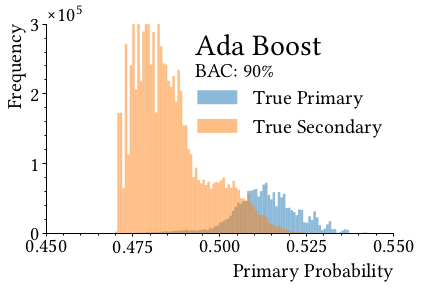

In [16]:
# data[data["prim"] == 0.0]["pred_prim_proba"].plot.hist(bins=50, alpha=0.5)
# ax = data[data["prim"] == 1.0]["pred_prim_proba"].plot.hist(bins=50, alpha=0.5)
# ax.set_ylim(0, 1e6)

fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
ax = fig.add_subplot(111)

ax.set_xlabel(r"Primary Probability", horizontalalignment="right", x=1)
ax.set_xlim(0.45, 0.55)
ax.set_ylabel(r"Frequency", horizontalalignment="right", y=1)
ax.set_ylim(0, 3e5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

p1 = data[data["prim"] == 1.0]["pred_prim_proba"].values
ax.hist(x=p1, bins=100, alpha=0.5, label="True Primary")

p0 = data[data["prim"] == 0.0]["pred_prim_proba"].values
ax.hist(x=p0, bins=100, alpha=0.5, label="True Secondary")

ax.text(
    0.43, 0.9, "Ada Boost", horizontalalignment="left", verticalalignment="center", transform=ax.transAxes, fontsize=30,
)

ax.text(
    0.43,
    0.78,
    f"BAC: {round(ada_bac*100)}%",
    horizontalalignment="left",
    verticalalignment="center",
    transform=ax.transAxes,
    fontsize=20,
)

ax.legend(loc="upper right", bbox_to_anchor=(1.02, 0.77))#, prop={"size": "x-small"})

fig.savefig(f"results/ada_hist.pdf", bbox_inches="tight")

display(fig)

Feature: T, Score: 0.16000
Feature: E, Score: 0.10000
Feature: Size, Score: 0.02000
Feature: EToF, Score: 0.36000
Feature: EnergyMoment, Score: 0.02000
Feature: TSpawn, Score: 0.00000
Feature: MaxEHit, Score: 0.04000
Feature: X, Score: 0.08000
Feature: Y, Score: 0.08000
Feature: Z, Score: 0.14000


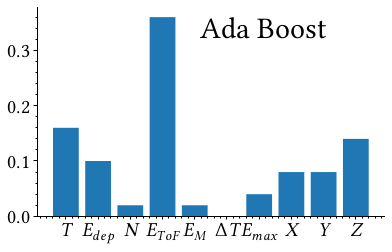

In [17]:
importance = ada_model.feature_importances_

for i, v in enumerate(importance):
    print("Feature: %s, Score: %.5f" % (features[i], v))

fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
ax = fig.add_subplot(111)
ax.bar([x for x in range(len(importance))], importance, tick_label=features_disp)
ax.text(
    0.47, 0.9, "Ada Boost", horizontalalignment="left", verticalalignment="center", transform=ax.transAxes, fontsize=30,
)

fig.savefig(f"results/ada_feat.pdf", bbox_inches="tight")

display(fig)